In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics

In [2]:
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# from pymystem3 import Mystem
# from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yerassyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\Yerassyl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

In [3]:
products = pd.read_csv('kaspi.csv',sep=';',header=0)

In [4]:
products = products.replace(np.nan, '', regex=True)

In [5]:
products.tail(3)

,Название продукта,Рейтинг,Достоинства,Недостатки,Комментарий
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый",Неудобный,В остальном всё хорошо
11637,Браслет Xiaomi Mi Band 3 черный,3,,"Уведомления мессенджеров не выходят. Ватсап, т...",
11638,Браслет Xiaomi Mi Band 3 черный,2,,"Не понравился то, что невозможно подключить к ...",


In [6]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Достоинства']) != str:
        products.iloc[i]['Достоинства'] = str(products.iloc[i]['Достоинства'])

In [7]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Недостатки']) != str:
        products.iloc[i]['Недостатки'] = str(products.iloc[i]['Недостатки'])

In [8]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Комментарий']) != str:
        products.iloc[i]['Комментарий'] = str(products.iloc[i]['Комментарий'])

In [9]:
def combined_features(row):
    return row['Достоинства'] + ' '+ row['Недостатки'] + ' '+ row['Комментарий']
products['Отзывы'] = products.apply(combined_features, axis=1)

In [10]:
products.head(5)

,Название продукта,Рейтинг,Достоинства,Недостатки,Комментарий,Отзывы
0,Смарт-часы Xiaomi Amazfit Bip Red,5,Цена и качество соответствуют! Отличное качест...,,Все отлично. Всем рекомендую,Цена и качество соответствуют! Отличное качест...
1,Смарт-часы Xiaomi Amazfit Bip Red,4,"Хорошо держится заряд батареи, уже неделю как ...",Не очень удобный ремешок у часов. Ошиблась при...,,"Хорошо держится заряд батареи, уже неделю как ..."
2,Смарт-часы Xiaomi Amazfit Bip Red,5,"Красивый, удобный, информативный, после подклю...","Нельзя управлять музыкой, gps немного врет - к...","В целом всем доволен. На руке стильно сидят, р...","Красивый, удобный, информативный, после подклю..."
3,Смарт-часы Xiaomi Amazfit Bip Red,5,,,Часы реальные. Рекомендую всем.,Часы реальные. Рекомендую всем.
4,Смарт-часы Xiaomi Amazfit Bip Red,5,"Брал в подарок, обладательница часов довольна!",,"Полезный и удобный аксессуар, рекомендую!","Брал в подарок, обладательница часов довольна!..."


In [11]:
kaspi = products.filter(['Название продукта','Рейтинг','Отзывы'], axis=1)

In [12]:
kaspi.tail(5)

,Название продукта,Рейтинг,Отзывы
11634,Браслет Xiaomi Mi Band 3 черный,2,Капсула хорошо зафиксирована в ремешке Сыроват...
11635,Браслет Xiaomi Mi Band 3 черный,1,Я очень расстроен.
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый Неудобный В ос..."
11637,Браслет Xiaomi Mi Band 3 черный,3,"Уведомления мессенджеров не выходят. Ватсап, ..."
11638,Браслет Xiaomi Mi Band 3 черный,2,"Не понравился то, что невозможно подключить к..."


In [15]:
# mystem = Mystem() 
# russian_stopwords = stopwords.words("russian")
# def preprocess_text(text):
#     tokens = mystem.lemmatize(text.lower())
#     tokens = [token for token in tokens if token not in russian_stopwords\
#               and token != " " \
#               and token.strip() not in punctuation]
    
#     text = " ".join(tokens)
    
#     return text

In [13]:
def cleanText(string):
    # Common cleaning
    string = string.lower()
    string = re.sub(r"http\S+", "", string)
    string = str.replace(string,'Ё','е')
    string = str.replace(string,'ё','е')
    prog = re.compile('[А-Яа-яA-Za-z]+')
    words = prog.findall(string.lower())
    
    stopwords = nltk.corpus.stopwords.words('russian')
    words = [w for w in words if w not in stopwords]
    functionalPos = {'CONJ', 'PRCL'}
    words = [w for w, pos in nltk.pos_tag(words, lang='rus') if pos not in functionalPos]
    stemmer = SnowballStemmer('russian')
    return ' '.join(list(map(stemmer.stem, words)))

In [14]:
#kaspi['Отзывы'] = kaspi['Отзывы'].apply(preprocess_text)
kaspi['Отзывы'] = kaspi['Отзывы'].apply(cleanText)

In [15]:
kaspi

,Название продукта,Рейтинг,Отзывы
0,Смарт-часы Xiaomi Amazfit Bip Red,5,цен качеств соответств отличн качеств пластик ...
1,Смарт-часы Xiaomi Amazfit Bip Red,4,держ заряд батар недел польз держ бюджетн вари...
2,Смарт-часы Xiaomi Amazfit Bip Red,5,красив удобн информативн подключен mi fit приш...
3,Смарт-часы Xiaomi Amazfit Bip Red,5,час реальн рекоменд всем
4,Смарт-часы Xiaomi Amazfit Bip Red,5,брал подарок обладательниц час довольн полезн ...
...,...,...,...
11634,Браслет Xiaomi Mi Band 3 черный,2,капсул зафиксирова ремешк сыроват прошивк поль...
11635,Браслет Xiaomi Mi Band 3 черный,1,очен расстро
11636,Браслет Xiaomi Mi Band 3 черный,3,качеств хорош непромока неудобн остальн
11637,Браслет Xiaomi Mi Band 3 черный,3,уведомлен мессенджер выход ватсап телеграмм см...


In [16]:
kaspi.Рейтинг = kaspi.Рейтинг.apply(pd.to_numeric)

In [17]:
def sentiment(n):
    return 1 if n >= 4 else 0
kaspi['sentiment'] = kaspi['Рейтинг'].apply(sentiment)
kaspi

,Название продукта,Рейтинг,Отзывы,sentiment
0,Смарт-часы Xiaomi Amazfit Bip Red,5,цен качеств соответств отличн качеств пластик ...,1
1,Смарт-часы Xiaomi Amazfit Bip Red,4,держ заряд батар недел польз держ бюджетн вари...,1
2,Смарт-часы Xiaomi Amazfit Bip Red,5,красив удобн информативн подключен mi fit приш...,1
3,Смарт-часы Xiaomi Amazfit Bip Red,5,час реальн рекоменд всем,1
4,Смарт-часы Xiaomi Amazfit Bip Red,5,брал подарок обладательниц час довольн полезн ...,1
...,...,...,...,...
11634,Браслет Xiaomi Mi Band 3 черный,2,капсул зафиксирова ремешк сыроват прошивк поль...,0
11635,Браслет Xiaomi Mi Band 3 черный,1,очен расстро,0
11636,Браслет Xiaomi Mi Band 3 черный,3,качеств хорош непромока неудобн остальн,0
11637,Браслет Xiaomi Mi Band 3 черный,3,уведомлен мессенджер выход ватсап телеграмм см...,0


In [18]:
X = kaspi['Отзывы']
y = kaspi['sentiment']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Logistic Regression

In [20]:
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [22]:
y_pred_class = model.predict(X_test_dtm)

In [23]:
accuracy_score(y_test, y_pred_class)

0.9481099656357388

In [24]:
Z = model.predict(X_test_dtm)
cm = confusion_matrix(y_test, Z)
cm

print ('Classification Report : ') 
print (classification_report(y_test, Z))

Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.25      0.37       173
           1       0.95      0.99      0.97      2737

    accuracy                           0.95      2910
   macro avg       0.81      0.62      0.67      2910
weighted avg       0.94      0.95      0.94      2910



# Baseline

In [25]:
clf_pipeline = Pipeline(
            [("vectorizer", TfidfVectorizer()), # Prod feature: tokenizer=cleanText
            ("classifier", LinearSVC())]
        )

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

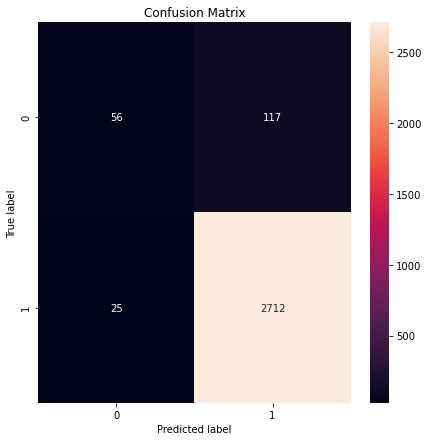

In [26]:
cm = metrics.confusion_matrix(y_test, clf_pipeline.predict(X_test))

def plotConfusionMatrix(cm):
    fig = plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

plotConfusionMatrix(cm)

In [27]:
print(metrics.classification_report(y_test, clf_pipeline.predict(X_test)))
f1_base = metrics.f1_score(y_test, clf_pipeline.predict(X_test))

              precision    recall  f1-score   support

           0       0.69      0.32      0.44       173
           1       0.96      0.99      0.97      2737

    accuracy                           0.95      2910
   macro avg       0.83      0.66      0.71      2910
weighted avg       0.94      0.95      0.94      2910



# Randomized Search CV on TfidfVectorizer and LogisticRegression

In [28]:
parameters = {'vectorizer__ngram_range': [(1, 2),(1, 3)],
              'vectorizer__min_df': [0.,.2,.4,.6,.8,1],
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }

In [29]:
clf_pipeline_LogitReg = Pipeline(
            [("vectorizer", TfidfVectorizer()),
            ("classifier", LogisticRegression())]
        )

In [30]:
def plotROC(y_test, probs, titl=''):
    if titl!='':
        titl = ' ('+titl+')' 
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic'+titl)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return None

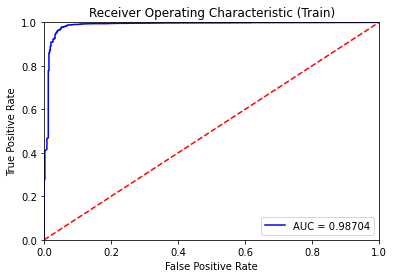

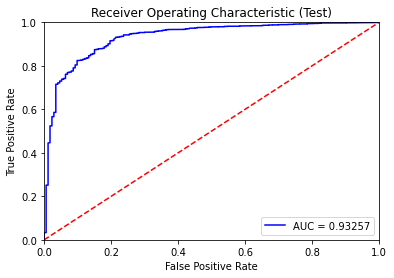

In [31]:
rndgs_clf_LogitReg = RandomizedSearchCV(clf_pipeline_LogitReg, parameters, scoring='f1', cv = 4, n_jobs=-1)
rndgs_clf_LogitReg.fit(X_train, y_train)

probs = rndgs_clf_LogitReg.predict_proba(X_train)[:,1]
plotROC(y_train, probs, 'Train')

probs = rndgs_clf_LogitReg.predict_proba(X_test)[:,1]
plotROC(y_test, probs, 'Test')

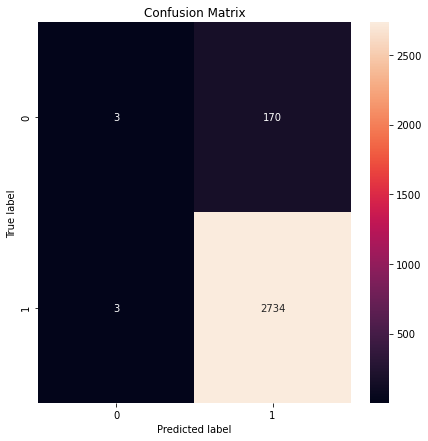

In [32]:
plotConfusionMatrix(metrics.confusion_matrix(y_test, rndgs_clf_LogitReg.predict(X_test)))

In [33]:
print(metrics.classification_report(y_test, rndgs_clf_LogitReg.predict(X_test)))
f1_rndLogR = metrics.f1_score(y_test, rndgs_clf_LogitReg.predict(X_test))

              precision    recall  f1-score   support

           0       0.50      0.02      0.03       173
           1       0.94      1.00      0.97      2737

    accuracy                           0.94      2910
   macro avg       0.72      0.51      0.50      2910
weighted avg       0.92      0.94      0.91      2910

